In [1]:
import pandas as pd

df = pd.read_csv("../data/sample_journal.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../data/sample_journal.csv'

In [2]:
import pandas as pd

df = pd.read_csv("../data/journal_entries.csv")
df.head()

,entry_id,date,account_code,amount,vendor,description,entered_by,time
0,1,2025-07-01,4000,500000,ABC Corp,Office Supplies,user01,09:15
1,2,2025-07-01,4000,-500000,ABC Corp,Refund,user01,09:20
2,3,2025-07-02,5000,1500000,XYZ Ltd,Equipment Purchase,user02,10:05
3,4,2025-07-03,4000,300000,DEF Inc,Travel Expenses,user03,11:45
4,5,2025-07-04,4000,200000,ABC Corp,Miscellaneous,user01,14:30


In [1]:
import pandas as pd

df = pd.read_csv("data/sample_journal.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/sample_journal.csv'

In [2]:
import os
os.getcwd()

'C:\\Users\\HyunSu\\Desktop\\Fraud Detection Legder\\notebooks'

In [3]:
import pandas as pd

df = pd.read_csv("../data/journal_entries.csv")
df.head()

,entry_id,date,account_code,amount,vendor,description,entered_by,time
0,1,2025-07-01,4000,500000,ABC Corp,Office Supplies,user01,09:15
1,2,2025-07-01,4000,-500000,ABC Corp,Refund,user01,09:20
2,3,2025-07-02,5000,1500000,XYZ Ltd,Equipment Purchase,user02,10:05
3,4,2025-07-03,4000,300000,DEF Inc,Travel Expenses,user03,11:45
4,5,2025-07-04,4000,200000,ABC Corp,Miscellaneous,user01,14:30


In [4]:
import pandas as pd

df = pd.read_csv("../data/journal_entries.csv")

# 1. 금액이 음수(환불)와 동일한 금액 양수 거래가 같은 vendor, 같은 날짜에 존재하는지 확인
df['potential_fraud'] = False

for idx, row in df.iterrows():
    if row['amount'] < 0:
        matching = df[
            (df['vendor'] == row['vendor']) & 
            (df['date'] == row['date']) & 
            (df['amount'] == -row['amount']) &
            (df['entry_id'] != row['entry_id'])
        ]
        if not matching.empty:
            df.at[idx, 'potential_fraud'] = True
            df.at[matching.index[0], 'potential_fraud'] = True

# 2. 금액이 1,000,000원 초과인 경우도 표시
df.loc[df['amount'].abs() > 1_000_000, 'potential_fraud'] = True

df.head(10)


,entry_id,date,account_code,amount,vendor,description,entered_by,time,potential_fraud
0,1,2025-07-01,4000,500000,ABC Corp,Office Supplies,user01,09:15,True
1,2,2025-07-01,4000,-500000,ABC Corp,Refund,user01,09:20,True
2,3,2025-07-02,5000,1500000,XYZ Ltd,Equipment Purchase,user02,10:05,True
3,4,2025-07-03,4000,300000,DEF Inc,Travel Expenses,user03,11:45,False
4,5,2025-07-04,4000,200000,ABC Corp,Miscellaneous,user01,14:30,False
5,6,2025-07-05,6000,750000,XYZ Ltd,Consulting Fees,user02,15:20,False
6,7,2025-07-05,4000,5000000,ABC Corp,Large Purchase,user01,16:00,True
7,8,2025-07-06,4000,-5000000,ABC Corp,Refund,user01,16:05,True
8,9,2025-07-07,7000,120000,GHI LLC,Marketing Expense,user04,09:30,False
9,10,2025-07-08,4000,250000,DEF Inc,Office Supplies,user03,10:00,False


In [1]:
import pandas as pd

df = pd.read_csv('data/sample_journal.csv')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'data/sample_journal.csv'

In [2]:
import os
print(os.getcwd())


C:\Users\HyunSu\Desktop\Fraud Detection Legder\notebooks


In [3]:
df = pd.read_csv('../data/sample_journal.csv')


FileNotFoundError: [Errno 2] No such file or directory: '../data/sample_journal.csv'

In [4]:
import os
print(os.getcwd())


C:\Users\HyunSu\Desktop\Fraud Detection Legder\notebooks


In [1]:
import os
print(os.getcwd())  # 현재 작업 폴더 확인
print(os.listdir('../data'))  # data 폴더 안 파일 목록 확인
print(os.path.exists('../data/sample_journal.csv'))  # 파일 존재 확인

C:\Users\HyunSu\Desktop\Fraud Detection Ledger\notebooks
['.ipynb_checkpoints', 'journal_entries.csv', 'requirements.txt']
False


In [2]:
df = pd.read_csv('journal_entries.csv')


NameError: name 'pd' is not defined

In [3]:
import pandas as pd



In [4]:
df = pd.read_csv('journal_entries.csv')
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'journal_entries.csv'

In [5]:
import os
print(os.getcwd())

C:\Users\HyunSu\Desktop\Fraud Detection Ledger\notebooks


In [6]:
df = pd.read_csv('../data/journal_entries.csv')


In [7]:
df.head()


,entry_id,date,account_code,amount,vendor,description,entered_by,time
0,1,2025-07-01,4000,500000,ABC Corp,Office Supplies,user01,09:15
1,2,2025-07-01,4000,-500000,ABC Corp,Refund,user01,09:20
2,3,2025-07-02,5000,1500000,XYZ Ltd,Equipment Purchase,user02,10:05
3,4,2025-07-03,4000,300000,DEF Inc,Travel Expenses,user03,11:45
4,5,2025-07-04,4000,200000,ABC Corp,Miscellaneous,user01,14:30


In [8]:
df.head()  # 상위 5개 행 출력
df.info()  # 데이터 타입, 결측치 확인
df.describe()  # 수치형 데이터 요약 통계


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   entry_id      10 non-null     int64 
 1   date          10 non-null     object
 2   account_code  10 non-null     int64 
 3   amount        10 non-null     int64 
 4   vendor        10 non-null     object
 5   description   10 non-null     object
 6   entered_by    10 non-null     object
 7   time          10 non-null     object
dtypes: int64(3), object(5)
memory usage: 772.0+ bytes


,entry_id,account_code,amount
count,10.00000,10.0000,1.000000e+01
mean,5.50000,4600.0000,3.120000e+05
std,3.02765,1074.9677,2.416286e+06
min,1.00000,4000.0000,-5.000000e+06
25%,3.25000,4000.0000,1.400000e+05
50%,5.50000,4000.0000,2.750000e+05
75%,7.75000,4750.0000,6.875000e+05
max,10.00000,7000.0000,5.000000e+06


In [9]:
# 데이터 불러오기
df = pd.read_csv('../data/journal_entries.csv')

# 임시 라벨 만들기: 금액이 1,000,000 이상이거나 음수면 잠재적 사기(True), 아니면 False
df['potential_fraud'] = df['amount'].apply(lambda x: True if abs(x) > 1000000 else False)

# 결과 확인
print(df[['amount', 'potential_fraud']].head())


    amount  potential_fraud
0   500000            False
1  -500000            False
2  1500000             True
3   300000            False
4   200000            False


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 데이터 불러오기
df = pd.read_csv('../data/journal_entries.csv')

# 임시 라벨 생성 (amount 기준)
df['potential_fraud'] = df['amount'].apply(lambda x: True if abs(x) >= 1000000 else False)

# 필요한 컬럼 선택 (여기서는 예시로 간단히)
features = ['amount', 'account_code', 'vendor', 'description', 'entered_by', 'time']

X = df[features]
y = df['potential_fraud']

# 범주형 변수 인코딩
for col in ['vendor', 'description', 'entered_by', 'time']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# 학습/테스트 데이터 분리 (70% 학습, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


C:\Users\HyunSu\AppData\Local\Temp\ipykernel_24248\2537491179.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HyunSu\AppData\Local\Temp\ipykernel_24248\2537491179.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\HyunSu\AppData\Local\Temp\ipykernel_24248\2537491179.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [11]:
for col in ['vendor', 'description', 'entered_by', 'time']:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      0.67      0.80         3
        True       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\HyunSu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HyunSu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HyunSu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7, 6)
X_test shape: (3, 6)
y_train shape: (7,)
y_test shape: (3,)


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 모델 생성
model = DecisionTreeClassifier(random_state=42)

# 훈련 데이터로 학습
model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 결과 평가
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\HyunSu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HyunSu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HyunSu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='entry_id', y='amount', hue='potential_fraud', style='potential_fraud', s=100)
plt.title('Amount vs Entry ID with Fraud Highlight')
plt.xlabel('Entry ID')
plt.ylabel('Amount')
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

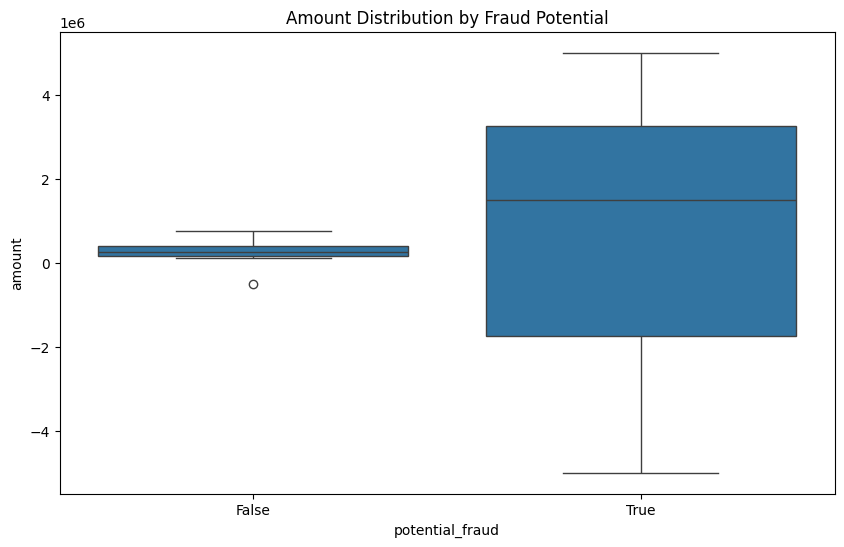

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='potential_fraud', y='amount', data=df)
plt.title('Amount Distribution by Fraud Potential')
plt.show()